In [2]:
import numpy as np
#import random
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import os
import seaborn as sns
from collections import defaultdict

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [57]:
DATA_DIR = os.path.join('.',"data")

## 1.1 Checking the patient dataset

In [310]:
data_pt = pd.read_csv(os.path.join(DATA_DIR, 'patient.csv'), sep='\t')
data_pt.rename(columns={'patientid': 'pt_id'}, inplace=True)
data_pt.head()
data_pt.shape

,pt_id,sex
0,13151,Female
1,43463,Female
2,42834,Male
3,37531,Female
4,31613,Female


(945, 2)

In [311]:
data_pt.drop_duplicates(inplace=True)
data_pt.shape

(940, 2)

In [312]:
data_pt.drop_duplicates(subset=['pt_id'], inplace=True)
data_pt.shape

(932, 2)

In [313]:
data_pt['sex'].unique()

array(['Female', 'Male', 'female', 'f', 'male', 'Not Reported', 'M', 'm'],
      dtype=object)

In [314]:
data_pt['sex'] = data_pt['sex'].astype(str).str.upper().str[0]
data_pt['sex'].unique()

array(['F', 'M', 'N'], dtype=object)

In [323]:
#Check missing values in specified columns.  
columns_to_check =['pt_id', 'sex']
row_with_missing_cx = [row_idx for row_idx, row in data_pt[columns_to_check].isnull().iterrows() if True in row.values]
print("\nMissing Value Summary\n{}".format("-"*35))
print(data_pt.isnull().sum(axis = 0))
if len(row_with_missing_cx) > 0:
    print("There were {} rows with missing diagnosis in data_pct dataset".format(len(row_with_missing_cx)))
else:
    print("There were no rows with missing data")


Missing Value Summary
-----------------------------------
pt_id    0
sex      0
dtype: int64
There were no rows with missing data


## 1.2. Check the diagnosis dataset

In [324]:
data_dx = pd.read_csv(os.path.join(DATA_DIR, 'diagnosis.csv'), sep='\t')
data_dx.head()
data_dx.shape
data_dx.dtypes

,pt_id,dos,dx_code
0,13151,2018-04-10,H35.3231
1,13151,2018-05-22,H35.3231
2,13151,2018-07-17,H35.3220
3,13151,2018-09-25,H35.3220
4,13151,2018-12-18,H35.3220


(4672, 3)

pt_id       int64
dos        object
dx_code    object
dtype: object

In [487]:
data_dx["dos"] = pd.to_datetime(data_dx['dos'])
data_dx['year']=data_dx['dos'].dt.year

,pt_id,year
count,4484.000000,4484.000000
mean,28106.253568,2016.185326
std,11515.361512,1.880254
min,10026.000000,2013.000000
25%,17673.000000,2015.000000
50%,27032.000000,2016.000000
75%,37531.000000,2018.000000
max,49965.000000,2019.000000


In [326]:
data_dx.drop_duplicates(inplace=True)
data_dx.shape

(4484, 4)

In [488]:
data_dx.describe()

,pt_id,year
count,4484.000000,4484.000000
mean,28106.253568,2016.185326
std,11515.361512,1.880254
min,10026.000000,2013.000000
25%,17673.000000,2015.000000
50%,27032.000000,2016.000000
75%,37531.000000,2018.000000
max,49965.000000,2019.000000


In [327]:
#Check missing values in specified columns. Note the missing value in Treatment Plan is not counted. 
columns_to_check =['pt_id', 'dos', 'dx_code']
row_with_missing_cx = [row_idx for row_idx, row in data_dx[columns_to_check].isnull().iterrows() if True in row.values]
print("\nMissing Value Summary\n{}".format("-"*35))
print(data_dx.isnull().sum(axis = 0))
if len(row_with_missing_cx) > 0:
    print("There were {} rows with missing diagnosis in data_pct dataset".format(len(row_with_missing_cx)))
else:
    print("There were no rows with missing data")


Missing Value Summary
-----------------------------------
pt_id      0
dos        0
dx_code    0
year       0
dtype: int64
There were no rows with missing data


## 1.3. Checking and prepocessing the procedure dataset

In [335]:
data_pct = pd.read_csv(os.path.join(DATA_DIR, 'procedure.csv'), sep='\t')
data_pct.rename(columns={'patient_id': 'pt_id'}, inplace=True)
data_pct.head()
data_pct.shape
data_pct.dtypes

,pt_id,dos,procedure_code,mod
0,10026,12/14/19,2027F,NaN
1,10026,11/13/19,92014,25
2,10026,11/6/19,G8427,NaN
3,10026,10/2/19,92134,NaN
4,10026,9/23/19,92014,25


(5222, 4)

pt_id              int64
dos               object
procedure_code    object
mod               object
dtype: object

In [336]:
data_pct.drop_duplicates(inplace=True)
data_pct.shape

(5149, 4)

In [337]:
data_pct["dos"] = pd.to_datetime(data_pct['dos'])
data_pct['year']=data_pct['dos'].dt.year
data_pct.head()

,pt_id,dos,procedure_code,mod,year
0,10026,2019-12-14,2027F,NaN,2019
1,10026,2019-11-13,92014,25,2019
2,10026,2019-11-06,G8427,NaN,2019
3,10026,2019-10-02,92134,NaN,2019
4,10026,2019-09-23,92014,25,2019


In [338]:
data_pct['procedure_code'].unique()

array(['2027F', '92014', 'G8427', '92134', '2026F', '1036F', '92012',
       '92226', 'EYLEAX1', '99213', '92015', '99212', '3072F', '2019F',
       '4177F', '92083', '67210', '92250', 'C9257', '92235', 'G8397',
       '92135', '99214', '76512', '67228', '92133', '2022F', '5010F',
       '2024F', '4040F', '3284F', '92225', '67028', 'J2778PF', 'J3590',
       'J9035', '92273', 'G8482', '67040', '92020', 'G8420', '99499',
       '92136', 'G8950', '67028MCR', 'J0178OU', 'J0178', 'LACS', '92002',
       '99024', 'G8753', 'LUC5SYRX1', 'G8756', 'G8754', 'G9974', 'J2778',
       'J7312', '92242', '67041', '92081', 'G9744', '66984', 'J7999',
       '3285F', '2021F', 'J2778-5', 'J2778,05MG', 'J2778-5P', 'G8752',
       'AVASTIN', 'G9903', 'RS000', '66821', 'G8918', 'G8907', 'J3490',
       '1', 'J9035,J3490,Q9977', 'D0000', '92283', 'J2778P', 'LUC5MG',
       'G8428', 'J2778DME', '92240', 'J2778POU'], dtype=object)

In [340]:
#Check missing values in specified columns. Note the missing value in Treatment Plan is not counted. 
columns_to_check =['pt_id', 'dos', 'procedure_code', 'mod']
row_with_missing_cx = [row_idx for row_idx,row in data_pct[columns_to_check].isnull().iterrows() if True in row.values]
print("\nMissing Value Summary\n{}".format("-"*35))
print(data_pct.isnull().sum(axis = 0))
if len(row_with_missing_cx) > 0:
    print("There were {} rows with missing modifier in data_pct dataset".format(len(row_with_missing_cx)))
else:
    print("There were no rows with missing data")


Missing Value Summary
-----------------------------------
pt_id                0
dos                  0
procedure_code       0
mod               3709
year                 0
dtype: int64
There were 3709 rows with missing modifier in data_pct dataset


In [341]:
data_pct = data_pct.fillna("NA").reset_index(drop = True)

In [489]:
data_pct.describe()

,pt_id,year
count,5149.000000,5149.000000
mean,28252.277141,2016.376384
std,11632.546529,1.879870
min,10026.000000,2013.000000
25%,17651.000000,2015.000000
50%,27494.000000,2016.000000
75%,38303.000000,2018.000000
max,49965.000000,2019.000000


# 2. Answers to questions

### Q1. What are the types of data quality issues or checks should you consider?

### Data checks include: 
* Duplicate date
* Missing values 
* Inconsistent values 
* Data types or format
* Distribution and outliers
* Discontinuty of coding

### Q2. How many patients have Wet Age-Related Macular Degeneration (wAMD) in the given dataset?

In [511]:
data_dx['dx_code'].unique()

array(['H35.3231', 'H35.3220', 'H35.3290', '312912001', 'H35.321',
       'H35.3210', '36252', '362.52', 'h35.329', 'H35.3291', 'H35.3293',
       'H35.3112', 'H35.3232', 'H35321', 'H35.3230', 'H35.3292',
       'H35.322', 'h35.321', 'H35.32', 'H43.811', 'H34.12', 'H35.81',
       'H02.403', '362.02', '374.3', 'H43.812', 'H04.123', 'H25.13',
       'H43.813', 'H43.13', 'E78.00', '366.16', '362.11', '367.4',
       'E11.9', 'E11.319', 'H31.013', 'H20.9', 'E11.359', 'H35.033',
       'H43.12', 'H18.20', 'H35.051', '368.9', '365.11', '362.16',
       'E11.331', 'H43.393', 'H18.59', 'E11.341', 'E11.311', 'H40.033',
       'H25.9', 'H26.493', '362.07', 'H35.059', 'H34.231', 'H52.13',
       'H52.4', 'H33.321', '362.81', 'H16.223', 'H53.2', 'H35.031',
       'H21.01', 'H04.122', '365.05', 'H40.11X', 'H18.51', 'H43.11',
       'H35.373', 'E11.329', '362.31', 'H52.223', 'H25.89', 'H31.093',
       'H53.40', 'H54.7', 'E11.339', 'H59.023', '373.12', 'H35.40',
       'H25.811', 'H35.372', 'H25.11

### The diagnosis code for wAMD is 362.52 in ICD-9-CM, and H35.32XX in ICD-10-CM, respectively

In [512]:
# h is the records for patient diagnozed with wAMD which is coded as H35.32XX and 362.52 in ICD-9-CM
h=data_dx[data_dx['dx_code'].str.contains('H35.32|362.52', case=False)]
h

,pt_id,dos,dx_code,year
0,13151,2018-04-10,H35.3231,2018
1,13151,2018-05-22,H35.3231,2018
2,13151,2018-07-17,H35.3220,2018
3,13151,2018-09-25,H35.3220,2018
4,13151,2018-12-18,H35.3220,2018
...,...,...,...,...
4634,17449,2015-08-01,362.52,2015
4635,17449,2013-03-13,362.52,2013
4636,39037,2013-03-23,362.52,2013
4639,39037,2013-04-22,362.52,2013


In [513]:
print('The numbe of patients having Wet Age-Related Macular Degeneration (wAMD) is {}'.format(len(set(h['pt_id']))))

The numbe of patients having Wet Age-Related Macular Degeneration (wAMD) is 418


### Q3. How many patients have wAMD in 2019?

In [514]:
print('The numbe of patients having Wet Age-Related Macular Degeneration (wAMD) in 2019 is {}'.format(len(set(h[h['year']==2019]['pt_id']))))

The numbe of patients having Wet Age-Related Macular Degeneration (wAMD) in 2019 is 66


### Q4. How many patients have wAMD between 2014-2017, stratified by sex?

In [517]:
pt_h = pd.merge(data_pt, h, on='pt_id', how='right')
pt_h.head()
pt_h.shape

,pt_id,sex,dos,dx_code,year
0,13151,F,2018-04-10,H35.3231,2018
1,13151,F,2018-05-22,H35.3231,2018
2,13151,F,2018-07-17,H35.3220,2018
3,13151,F,2018-09-25,H35.3220,2018
4,13151,F,2018-12-18,H35.3220,2018


(1251, 5)

In [518]:
pt_h.describe()

,pt_id,year
count,1251.000000,1251.000000
mean,29438.142286,2016.433253
std,11624.906565,1.911895
min,10026.000000,2013.000000
25%,18796.000000,2015.000000
50%,30117.000000,2017.000000
75%,39018.500000,2018.000000
max,49965.000000,2019.000000


In [519]:
pt_h_14to17=pt_h[(pt_h['year']>=2014) & (pt_h['year']<=2017)]
print('The numbe of patients having Wet Age-Related Macular Degeneration (wAMD) between 2014 and 2017, stratified by sex')
temp=pt_h_14to17.groupby(['sex'],as_index=False).agg(order=('pt_id', 'count'))
temp

The numbe of patients having Wet Age-Related Macular Degeneration (wAMD) between 2014 and 2017, stratified by sex


,sex,order
0,F,327
1,M,362
2,N,1


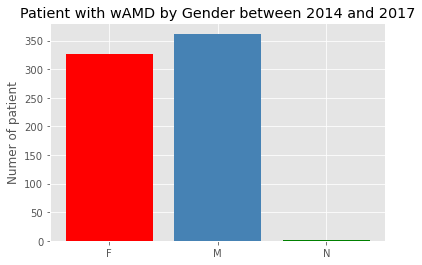

In [520]:
plt.bar(temp['sex'], temp['order'], color=('red','steelblue','green'))
plt.title('Patient with wAMD by Gender between 2014 and 2017')
plt.ylabel('Numer of patient');
plt.show();

### 5. How would you determine if sex is associated with an increased risk of wAMD?

In [521]:
pt_h.groupby(['year', 'sex'],as_index=False).agg(order=('pt_id', 'count'))

,year,sex,order
0,2013,F,61
1,2013,M,32
2,2013,N,1
3,2014,F,73
4,2014,M,87
5,2015,F,101
6,2015,M,81
7,2016,F,79
8,2016,M,95
9,2016,N,1


In [551]:
columns_to_show =['pt_id']
tmp=pd.pivot_table(pt_h, index = ['sex', 'year'], values=columns_to_show, aggfunc='count')
#tmp

pt_id
sex year       
F   2013     61
    2014     73
    2015    101
    2016     79
    2017     74
    2018    125
    2019    124
M   2013     32
    2014     87
    2015     81
    2016     95
    2017     99
    2018    120
    2019     95
N   2013      1
    2016      1
    2018      3

In [554]:
pd.pivot_table(pt_h, index = ['sex'], values=columns_to_show, aggfunc='count')

,pt_id
sex,
F,637
M,609
N,5


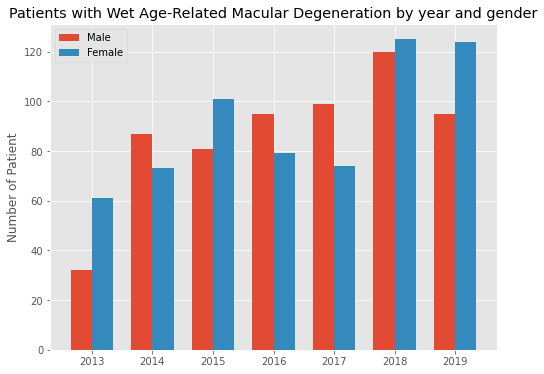

In [549]:
labels = ['2013', '2014', '2015', '2016', '2017', '2018', '2019']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - width/2, tmp.loc[('M'), :]['pt_id'], width, label='Male')
rects2 = ax.bar(x + width/2, tmp.loc[('F'), :]['pt_id'], width, label='Female')

ax.set_ylabel('Number of Patient');
ax.set_title('Patients with Wet Age-Related Macular Degeneration by year and gender');
ax.set_xticks(x);
ax.set_xticklabels(labels);
ax.legend();

In [506]:
from scipy import stats
f=pt_h_all[pt_h_all['sex'] =='F'].copy()
m=pt_h_all[pt_h_all['sex'] =='M'].copy()
print(stats.ttest_ind(f['order'], m['order'], ))

Ttest_indResult(statistic=nan, pvalue=nan)


/Users/yee/miniconda3/envs/env_viz/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/yee/miniconda3/envs/env_viz/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### 6. How many women diagnosed with wAMD between 2014-2017 also had an intravitreal injection during that time?

In [394]:
data_pct.rename(columns={'patient_id': 'pt_id'}, inplace=True)
pt_h_pct = pd.merge(pt_h_14to17, data_pct, on=['pt_id','year'], how='inner')
pt_h_pct_F=pt_h_pct[pt_h_pct['sex']=='F']

,pt_id,sex,dos_x,dx_code,year,dos_y,procedure_code,mod
130,30117,F,2017-10-10,H35.321,2017,2017-10-10,67028,RT
131,30117,F,2017-10-10,H35.321,2017,2017-10-10,J9035,NA
132,30117,F,2017-10-10,H35.321,2017,2017-11-14,J9035,NA
133,30117,F,2017-10-10,H35.321,2017,2017-11-14,67028,RT
134,30117,F,2017-10-10,H35.321,2017,2017-12-12,67028,RT
...,...,...,...,...,...,...,...,...
3234,15173,F,2016-01-08,H35.32,2016,2016-01-08,2027F,NA
3237,47897,F,2016-01-08,H35.32,2016,2016-01-08,92133,NA
3238,46467,F,2017-12-20,H35.32,2017,2017-12-20,4177F,NA
3241,24699,F,2017-12-20,H35.32,2017,2017-12-20,2027F,NA


In [399]:
pt_h_pct_F['procedure_code'].unique()

array(['67028', 'J9035', 'J7999', 'J2778-5', 'J2778,05MG', 'J2778-5P',
       'J0178', 'J2778', 'J2778DME', '99214', '92012', '99213', '92134',
       '2019F', '92133', 'EYLEAX1', '92014', '5010F', '92226', '99212',
       'G8756', '4177F', '99499', '3284F', '92250', '2024F', 'C9257',
       '67040', 'G8427', '99024', '92225', '1036F', 'G8482', '92235',
       '2021F', '76512', '2026F', '3072F', '92135', '92136', '3285F',
       '67228', '67210', '66984', 'LACS', '4040F', '2022F', '92015',
       'G8918', '2027F'], dtype=object)

In [400]:
pt_h_pct_F[pt_h_pct_F['procedure_code'].isin(['67028'])].groupby('sex').agg(order=('pt_id','count'))

,order
sex,
F,301


### Q7. What is the most common type of intravitreal injection in women diagnosed with wAMD between 2014-2017?

In [253]:
pt_h_pct_F[pt_h_pct_F['procedure_code'].isin(['67028'])].groupby('mod').agg(order=('pt_id','count')).sort_values(by="order",ascending=False)

,order
mod,
RT,148
NA,125
LT,28


### 8. Stratify the type and count of intravitreal injections by eye laterality (right, left, unspecified) in 2014-2017 for patients with wAMD by year.

In [408]:
df=pt_h_pct[pt_h_pct['procedure_code'].isin(['67028'])].copy()
df['mod'].unique()

array(['LT', 'NA', 'RT', '50', '18944008'], dtype=object)

In [406]:
df['mod']=df['mod'].map(lambda x: x.replace('18944008','RT').replace('50','BI'))
df['mod'].unique()

array(['LT', 'NA', 'RT', 'BI'], dtype=object)

In [407]:
columns_to_show =['dos_y']
pd.pivot_table(df, index = ['year', 'mod'], values=columns_to_show, aggfunc='count')

dos_y
year mod       
2015 NA      23
     RT       1
2016 BI       6
     LT       5
     NA     179
     RT      27
2017 LT     180
     NA     145
     RT     145

### Q9. Find the ratio of patient diagnosis dates that have a corresponding procedure date? Does this ratio tell you anything about the data? If so, what might it indicate?

In [387]:
pt_dx = pd.merge(data_pt, data_dx, on='pt_id', how='right')
pt_dx

,pt_id,sex,dos,dx_code,year
0,13151,F,2018-04-10,H35.3231,2018
1,13151,F,2018-05-22,H35.3231,2018
2,13151,F,2018-07-17,H35.3220,2018
3,13151,F,2018-09-25,H35.3220,2018
4,13151,F,2018-12-18,H35.3220,2018
...,...,...,...,...,...
4479,37245,M,2014-01-18,379.23,2014
4480,10520,M,2014-01-28,362.35,2014
4481,42830,F,2014-02-07,366.16,2014
4482,29319,M,2014-02-17,366.16,2014


In [388]:
pt_dx_pct_all = pd.merge(pt_dx, data_pct, on=['pt_id', 'dos'], how='left')
pt_dx_pct_all

,pt_id,sex,dos,dx_code,year_x,procedure_code,mod,year_y
0,13151,F,2018-04-10,H35.3231,2018,J0178,NA,2018.0
1,13151,F,2018-04-10,H35.3231,2018,67028,59,2018.0
2,13151,F,2018-05-22,H35.3231,2018,J0178,NA,2018.0
3,13151,F,2018-05-22,H35.3231,2018,67028,59,2018.0
4,13151,F,2018-07-17,H35.3220,2018,67028,LT,2018.0
...,...,...,...,...,...,...,...,...
5881,37245,M,2014-01-18,379.23,2014,92134,NA,2014.0
5882,10520,M,2014-01-28,362.35,2014,99214,NA,2014.0
5883,42830,F,2014-02-07,366.16,2014,99213,NA,2014.0
5884,29319,M,2014-02-17,366.16,2014,99213,25,2014.0


In [389]:
#Check missing values in specified columns. 
columns_to_check =['procedure_code']
row_with_missing = [row_idx for row_idx, row in pt_dx_pct_all[columns_to_check].isnull().iterrows() if True in row.values]
print("\nMissing Value Summary\n{}".format("-"*35))
print(pt_dx_pct_all.isnull().sum(axis = 0))
print(pt_dx_pct_all.iloc[row_with_missing])


Missing Value Summary
-----------------------------------
pt_id             0
sex               0
dos               0
dx_code           0
year_x            0
procedure_code    1
mod               1
year_y            1
dtype: int64
      pt_id sex        dos   dx_code  year_x procedure_code  mod  year_y
1041  43502   M 2017-02-16  H35.3210    2017            NaN  NaN     NaN


In [390]:
print('The ratio of patient diagnosis dates that have a corresponding procedure date is {}'.format((len(pt_h_pct_all)-len(row_with_missing))/len(pt_h_pct_all)))

The ratio of patient diagnosis dates that have a corresponding procedure date is 0.999830364715861


### The ratio is close to 1, indicating that the majority of the patient received the treatment on the same day of the diagnosis

### Q10. Are there any issues with the data? If so, what issues did you notice?

# We noticed the following data quality issses:
1. There are duplicate values in patient, diagnosis, and procedures data
2. In patient data, there are eight distinct values in the sex category. They are normalized to two
3. In the patient data, there are 8 patient_id having different sex 
4. There are missing values in the mod column in procedure data
5. The terms used in the modifier in the procedure data are not normalized. For example, '18944008' and 'RT' are both referred to the Right eye structure

### Q11. How would you define completeness of patient notes and how would you go about validating it?

### Q12. If you were to build a threshold for acceptable data quality, what would you take into consideration and how would you approach it?